House Prices Data Analysis & Prediction Algorithm - Kağan Tek 

We start by importing the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

We open our csv file in pandas an in order to prepare it for the heatmap we get it's numeric values and correlation to another variable named "price_cor".

After that, we see the first 5 elements of our dataset in order to get more familiar.

In [2]:
price = pd.read_csv("train.csv")
price_cor = price._get_numeric_data().corr()
price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

After we see a sample of our dataset we see a description of our dataset just in case we need to process our data.

In [4]:
price.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We check for null datas so we can fill them out with the mean value in order to have a healthier analysis.

In [5]:
price.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

It shows that we have 259 null data in the column "LotFrontage", therefore we fill it with it's mean values.

In [6]:
price["LotFrontage"].fillna(price["LotFrontage"].mean(), inplace = True)

In [7]:
price.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

I decide to code a function here that shows me the full data frame of how many null elements that I have in my dataset.

In [8]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)

    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)

    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])

    print(missing_df, end="\n")

    if na_name:
        return na_columns

missing_values_table(price)

              n_miss  ratio
PoolQC          1453  99.52
MiscFeature     1406  96.30
Alley           1369  93.77
Fence           1179  80.75
FireplaceQu      690  47.26
GarageType        81   5.55
GarageYrBlt       81   5.55
GarageFinish      81   5.55
GarageQual        81   5.55
GarageCond        81   5.55
BsmtExposure      38   2.60
BsmtFinType2      38   2.60
BsmtQual          37   2.53
BsmtCond          37   2.53
BsmtFinType1      37   2.53
MasVnrType         8   0.55
MasVnrArea         8   0.55
Electrical         1   0.07


I proceed to code another function that fills those empty columns, the numerical ones with the mean value and the categorical ones with the modes.

In [9]:
def quick_missing_imp(data, num_method="median", cat_length=20, target="SalePrice"):
    variables_with_na = [col for col in data.columns if data[col].isnull().sum() > 0]

    temp_target = data[target]

    print("# BEFORE")
    print(data[variables_with_na].isnull().sum(), "\n\n")

    data = data.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= cat_length) else x, axis=0)

    if num_method == "mean":
        data = data.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)
    elif num_method == "median":
        data = data.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)

    data[target] = temp_target

    print("# AFTER \n Imputation method is 'MODE' for categorical variables!")
    print(" Imputation method is '" + num_method.upper() + "' for numeric variables! \n")
    print(data[variables_with_na].isnull().sum(), "\n\n")

    return data

price = quick_missing_imp(price, num_method="median", cat_length=17)

# BEFORE
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64 


# AFTER 
 Imputation method is 'MODE' for categorical variables!
 Imputation method is 'MEDIAN' for numeric variables! 

Alley           0
MasVnrType      0
MasVnrArea      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64 




After being sure that all of the null values are filled, we can go on to visualize our data firstly in the form of a heatmap in order to see the correlations between the parameters

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5]),
 [Text(0.5, 0, 'Id'),
  Text(1.5, 0, 'MSSubClass'),
  Text(2.5, 0, 'LotFrontage'),
  Text(3.5, 0, 'LotArea'),
  Text(4.5, 0, 'OverallQual'),
  Text(5.5, 0, 'OverallCond'),
  Text(6.5, 0, 'YearBuilt'),
  Text(7.5, 0, 'YearRemodAdd'),
  Text(8.5, 0, 'MasVnrArea'),
  Text(9.5, 0, 'BsmtFinSF1'),
  Text(10.5, 0, 'BsmtFinSF2'),
  Text(11.5, 0, 'BsmtUnfSF'),
  Text(12.5, 0, 'TotalBsmtSF'),
  Text(13.5, 0, '1stFlrSF'),
  Text(14.5, 0, '2ndFlrSF'),
  Text(15.5, 0, 'LowQualFinSF'),
  Text(16.5, 0, 'GrLivArea'),
  Text(17.5, 0, 'BsmtFullBath'),
  Text(18.5, 0, 'BsmtHalfBath'),
  Text(19.5, 0, 'FullBath'),
  Text(20.5, 0, 'HalfBath'),
  Text(21.5, 0, 'BedroomAbvGr'),
  Text(22.5, 0, 'KitchenAbvGr'),
  Text(23.5, 0, 'TotRmsAbvGrd'),
  Text(2

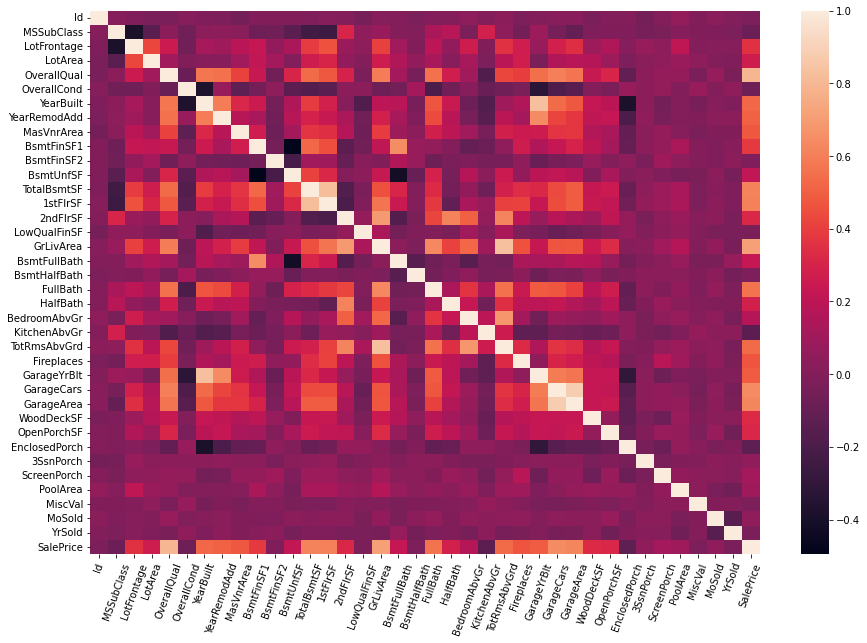

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(price_cor, annot = False)
plt.xticks(rotation = 70)

Seeing from the light squares I determined what parameters are in correlation with "SalePrice", and I started to visualize them one by one

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

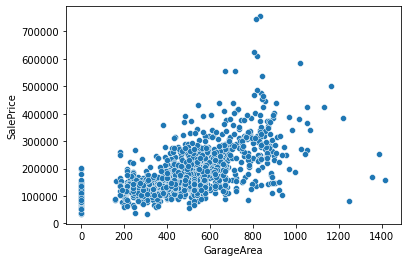

In [11]:
#SalePrice-LotFrontage, LotArea, OverallQual, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, Fireplaces, GarageYrBlt, 

sns.scatterplot(x='GarageArea', y='SalePrice', data = price)
#We can see that in general, the bigger a garage is the higher the house's price that it's in.

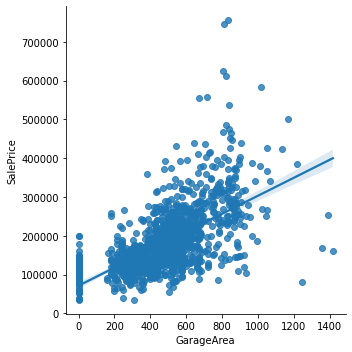

In [12]:
#We can also see that proven with the regression line.
sns.lmplot(x='GarageArea', y='SalePrice', data = price)

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

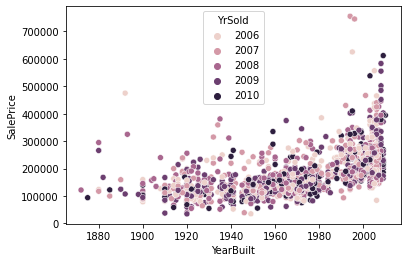

In [13]:
#We can see with this graphic that, the newer house gets sold for the higher price.
sns.scatterplot(data = price, x = 'YearBuilt', y = 'SalePrice', hue = "YrSold")

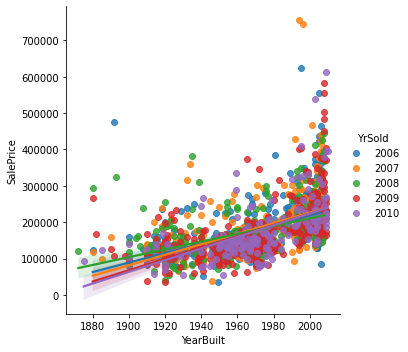

In [14]:
#We can also see that the "YrSold" parameter doesn't make that much of a difference aside from the increasement rate of the prices.
sns.lmplot(data = price, x = 'YearBuilt', y = 'SalePrice', hue = "YrSold")

The analysis continues with parameters that are in correlation with each other.

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

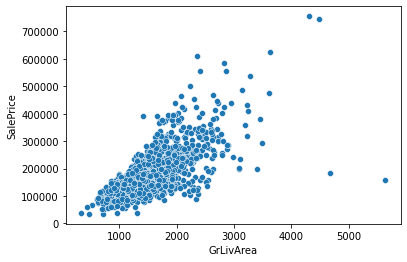

In [15]:
sns.scatterplot(data = price, x = 'GrLivArea', y = 'SalePrice')

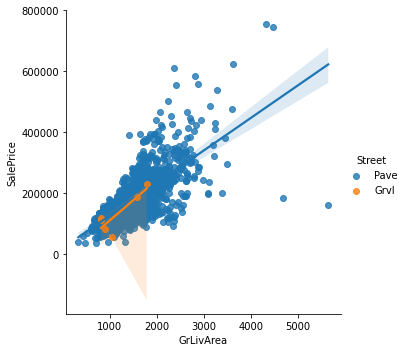

In [16]:
sns.lmplot(data = price, x = 'GrLivArea', y = 'SalePrice', hue = 'Street')

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

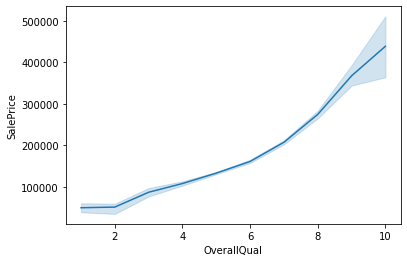

In [17]:
sns.lineplot(data = price, x = 'OverallQual', y = 'SalePrice')